<a href="https://colab.research.google.com/github/sawyermade/Undergraduate-Computer-Vision/blob/main/CAP_4410_Lecture_1_Image_Thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Copyright (c) 2021, Sudeep Sarkar, University of South Florida, Tampa

#Topic: Images and videos as arrays, image thresholding (text separation)

#Google Colab

We will use Jupiter-style Notebooks in this course. We will use Google Colab to get free GPU access. Would you please set up your own Colab account using your USF Gmail address (aaaa@mail.usf.edu)? If you do not have one, which might be the case for some of you, set up a google account that you can use. I would advise using a newly set up account different from your personal account for privacy and security reason. We would be mounting the associated Google drive that comes with your account to Colab for easy file access.

You will be asked to modify and run code in the class, so please access a laptop with colab during the lectures.


# Numpy

"NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more. At the core of the NumPy package, is the ndarray object."

https://numpy.org/doc/stable/user/whatisnumpy.html

You can learn the basics of numpy from https://numpy.org/doc/stable/user/basics.html




#Matplot

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

https://matplotlib.org/

# Scikit-image

scikit-image is a collection of algorithms for image processing. It is available free of charge and free of restriction. 

https://scikit-image.org/

https://scikit-image.org/docs/dev/user_guide/getting_started.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage import io

np.set_printoptions(precision=2)

# Download sample data and extract it


In [ ]:
# Download and extract
data_dir = '/content/data/'
!gdown https://drive.google.com/uc?id=18sKOktfFnAeUGYA1ZO_5ML2srsRvfbPa -O data.zip
!unzip -o data.zip > /dev/null
!rm data.zip
!ls $data_dir

Downloading...
From: https://drive.google.com/uc?id=18sKOktfFnAeUGYA1ZO_5ML2srsRvfbPa
To: /content/data.zip
9.73MB [00:00, 59.6MB/s]
 apple.jpg				     mountain_peak_2.png
'Armes 1.png'				     parking_lot_meva_1.png
'Armes 2.png'				     parking_lot_meva_2.png
 declaration_of_independence_stone_630.jpg   parking_lot_meva_3.png
 house_1.png				    'Superbowl 2021_1.png'
 house_2.png				    'Superbowl 2021_2.png'
 lizard.jpg				    'Superbowl 2021_3.png'
 mountain_peak_1.png


# Mount Google drive to access your file structure
You can store your input and output files on your Google drive so that they persist across sessions. You can use the "Backup and Sync" app from Google to mount it on your laptop to have local access to them.

In [ ]:
## Mount Google drive
from google.colab import drive
drive.mount('/content/drive')
# !ls '/content/drive/MyDrive/Colab Notebooks/CAP 4410 - UG Computer Vision/data'
!ls '/content/drive/MyDrive'

Mounted at /content/drive
 assignment4.ipynb
 Assignment_4.ipynb
 computer_vision_2021
'Copy of Deep Net for Emotion Gesture.ipynb'
 cv_ta_fa21
 Darshil_Kapadia_3D_Transformation.ipynb
 data
 data_mining
 misc
 netid_jupyter_project-1.ipynb


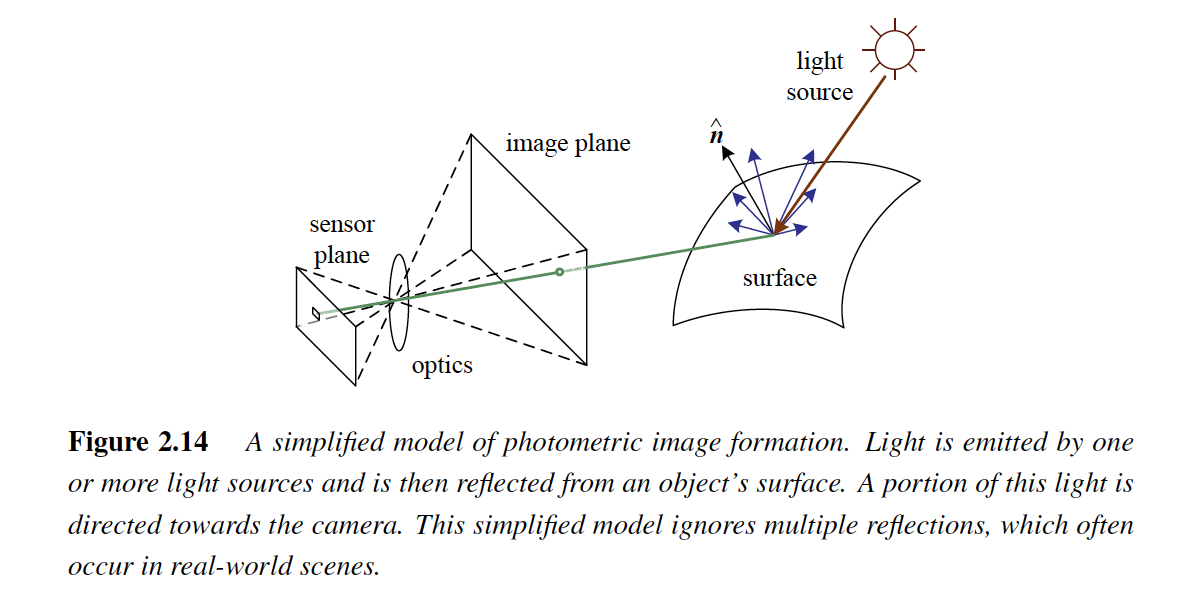

# Read image

* An image is represented in a computer as an array of **pixels** -- a three-dimensional array (row, col, color).
* Color at a pixel is captured by three numbers that represent the number of primary colors - red, blue, green.



 Size of color image array (#row, #col, bgr): (612, 612, 3) Data type: uint8

 Pixel values of a 2 by 2 block
 [[[168  45  38]
  [152  34  24]]

 [[143  20  13]
  [176  58  46]]]


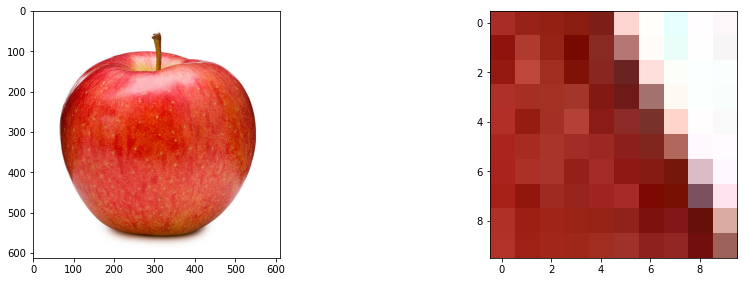

In [ ]:
'''
Read in an image, 
'''
# Load an color image 
imfile_name = data_dir + 'apple.jpg'

color_img = io.imread(imfile_name)
print ('\n Size of color image array (#row, #col, bgr):', color_img.shape, 'Data type:', color_img.dtype)

print('\n Pixel values of a 2 by 2 block\n', color_img[200:202,520:522,:])

# plot the image on screen and other plots
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.imshow(color_img);

plt.subplot(2,2,2)
plt.imshow(color_img[200:210,520:530,:]);

# Color channels


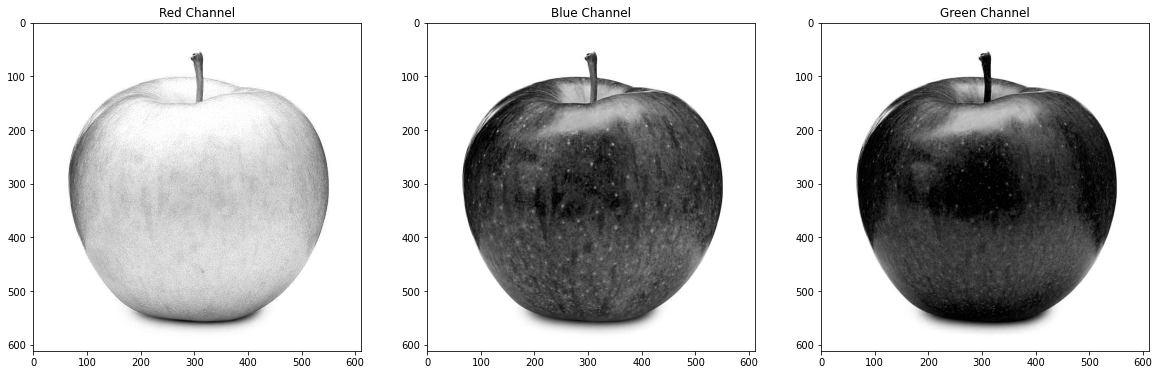

In [ ]:
# Show the blue, green, red channels

# Example of how to create plots
# using the variable axs for multiple Axes
fig, axs = plt.subplots(1, 3)
fig.set_size_inches (20, 10)

axs[0].imshow(color_img[:,:,0], 'gray');
axs[0].set_title('Red Channel')

axs[1].imshow(color_img[:,:,1], 'gray');
axs[1].set_title('Blue Channel')

axs[2].imshow(color_img[:,:,2], 'gray');
axs[2].set_title('Green Channel');



# Gray level image



 Size of gray level image: (612, 612) Data type: uint8


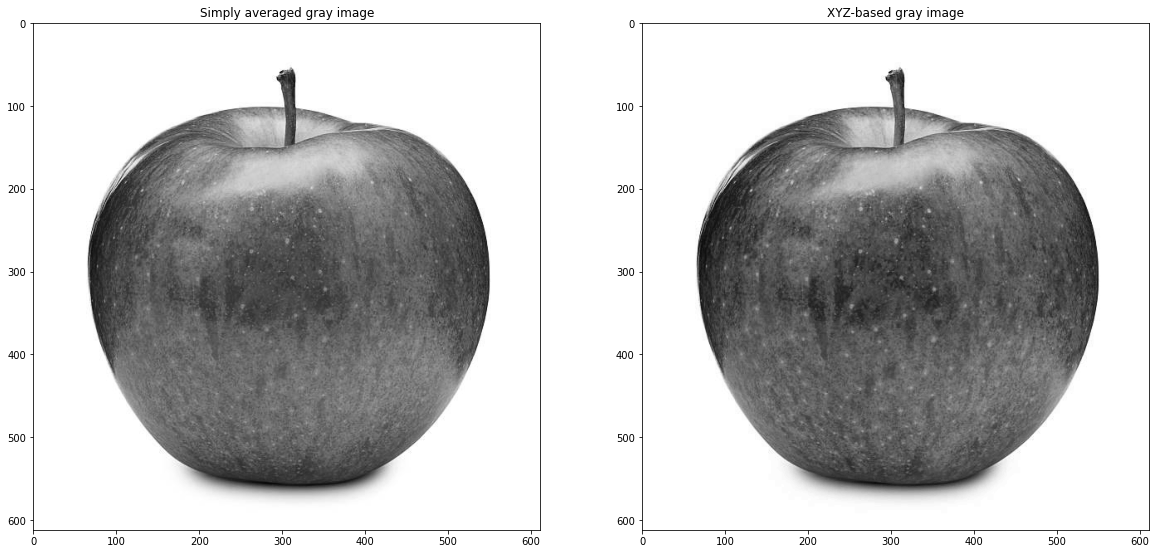

In [ ]:
'''
Gray level image = average of the 3 color channels
'''
gray_img = (color_img[:,:,0].astype(float) + color_img[:,:,1].astype(float) + color_img[:,:,2].astype(float))/3
# What is the "astype" extension doing? Why do we need it?
gray_img = gray_img.astype (np.uint8)

print('\n Size of gray level image:', gray_img.shape, 'Data type:', gray_img.dtype)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches (20, 10)
axs[0].imshow(gray_img, 'gray');
axs[0].set_title('Simply averaged gray image');

# The following combination of RGB better represents what human's perceive as gray level in a color image.
# Y = 0.2125 R + 0.7154 G + 0.0721 B
# You can learn more about color perception at http://poynton.ca/PDFs/ColorFAQ.pdf 
# Color perception and representation in images is not as simple. 
# RGB is not the best representation.

xyz_gray_img = (0.2125 * color_img[:,:,0].astype(float) + 0.7154 * color_img[:,:,1].astype(float) + 0.0721 * color_img[:,:,2].astype(float))/3
xyz_gray_img = xyz_gray_img.astype (np.uint8)

axs[1].imshow(xyz_gray_img, 'gray');
axs[1].set_title('XYZ-based gray image');


# Another example


[[0.91 0.91 0.92 ... 0.9  0.9  0.9 ]
 [0.91 0.91 0.9  ... 0.9  0.9  0.9 ]
 [0.91 0.91 0.88 ... 0.9  0.9  0.9 ]
 ...
 [0.91 0.91 0.91 ... 0.9  0.9  0.9 ]
 [0.91 0.91 0.91 ... 0.9  0.9  0.91]
 [0.91 0.91 0.91 ... 0.91 0.91 0.9 ]]


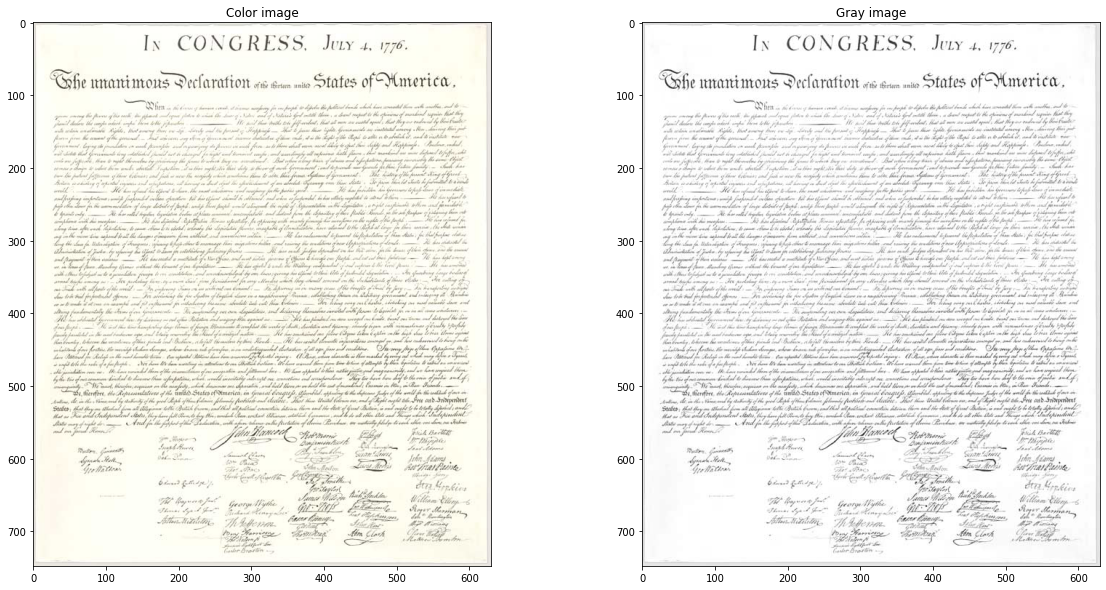

In [ ]:
imfile_name = data_dir + 'declaration_of_independence_stone_630.jpg'
doi = io.imread(imfile_name)

# function that turns rgb image to gray, however, note the range. It is from 0 to 1
from skimage.color import rgb2gray
gdoi = rgb2gray(doi)
print(gdoi)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches (20, 10)

axs[0].imshow(doi, 'gray');
axs[0].set_title('Color image');

axs[1].imshow(gdoi, 'gray');
axs[1].set_title('Gray image');


# Thresholding


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


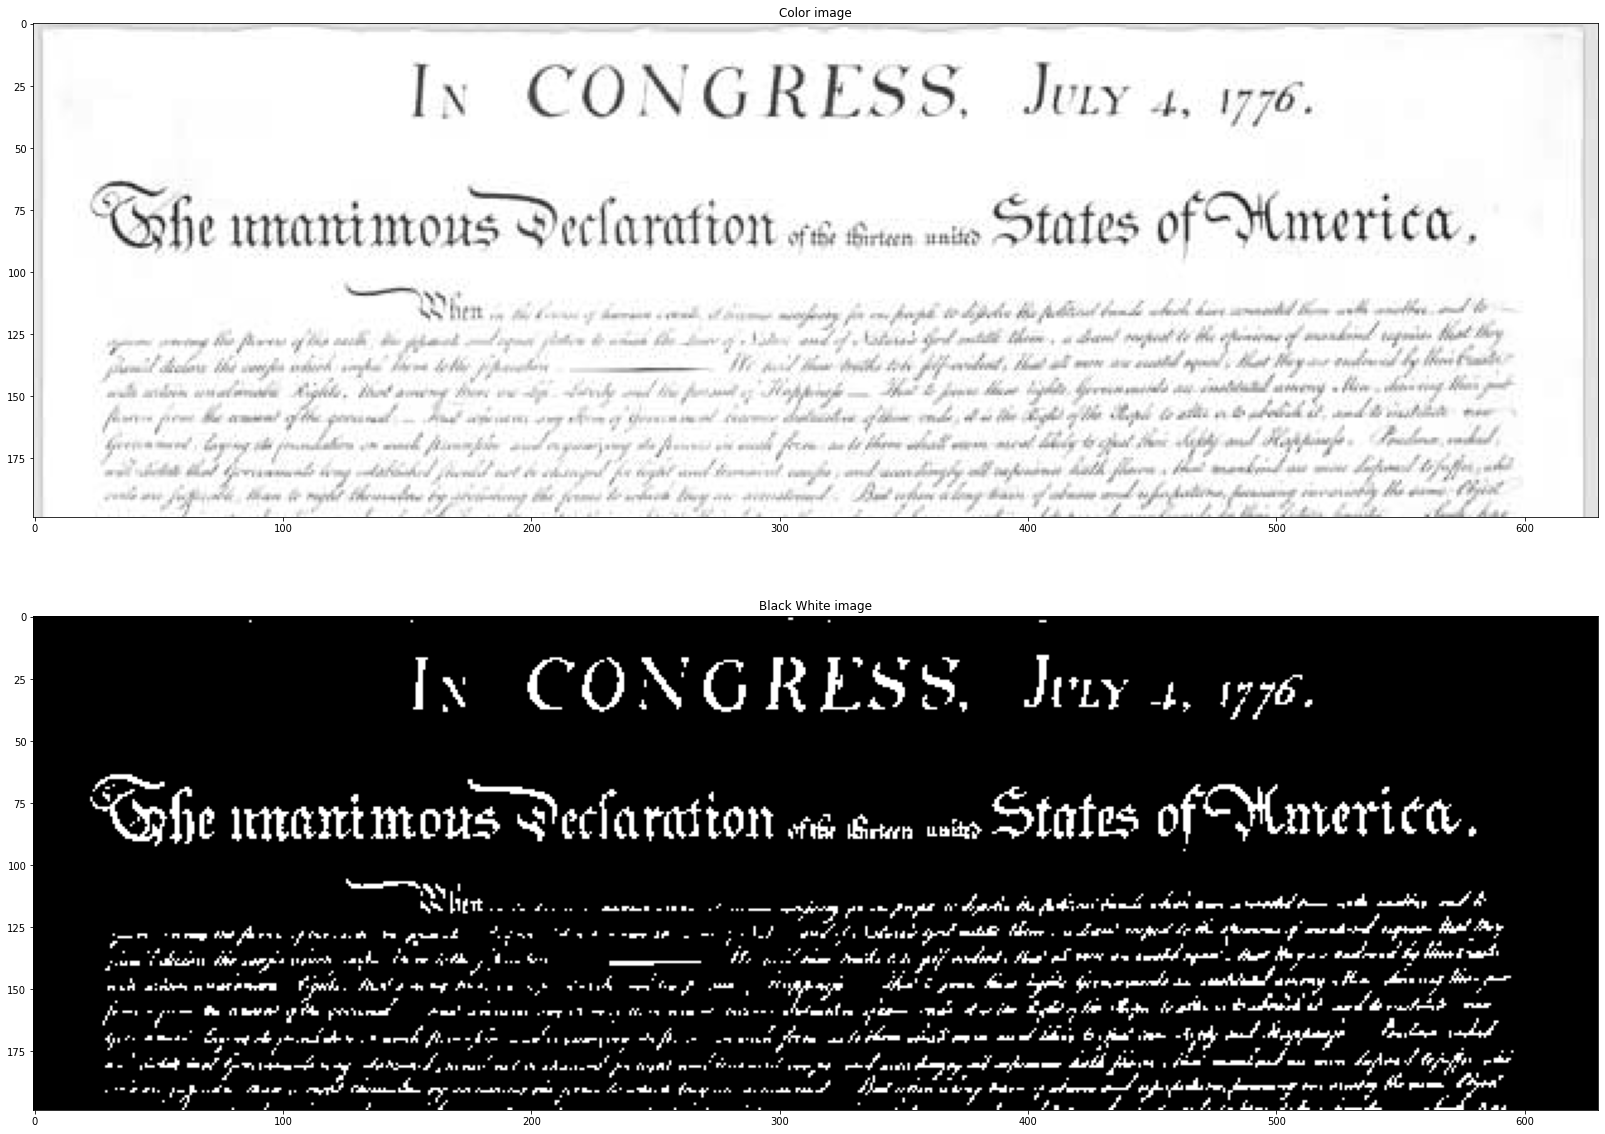

In [ ]:
fig, axs = plt.subplots(2, 1)
fig.set_size_inches (40, 20)

axs[0].imshow(gdoi[1:200,:], 'gray');
axs[0].set_title('Color image');

'''
Thresholding
'''
bw_doi = np.where(gdoi > 0.8, 0, 1)
print (bw_doi)
axs[1].imshow(bw_doi[1:200,:], 'gray');
axs[1].set_title('Black White image');

# Image histogram

The image histogram is the plot of the pixel count of different values.

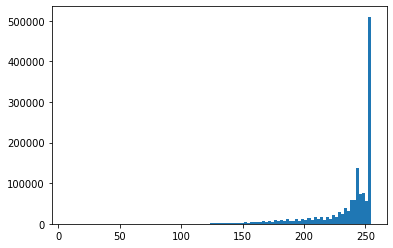

In [ ]:
ax = plt.hist(doi.ravel(), bins = 100)

# Plot of the number of pixels with a value of 255 along each row

We can use this signal to break up the document into lines. 

Idea: Look for the **local** minima. How would you detect them?

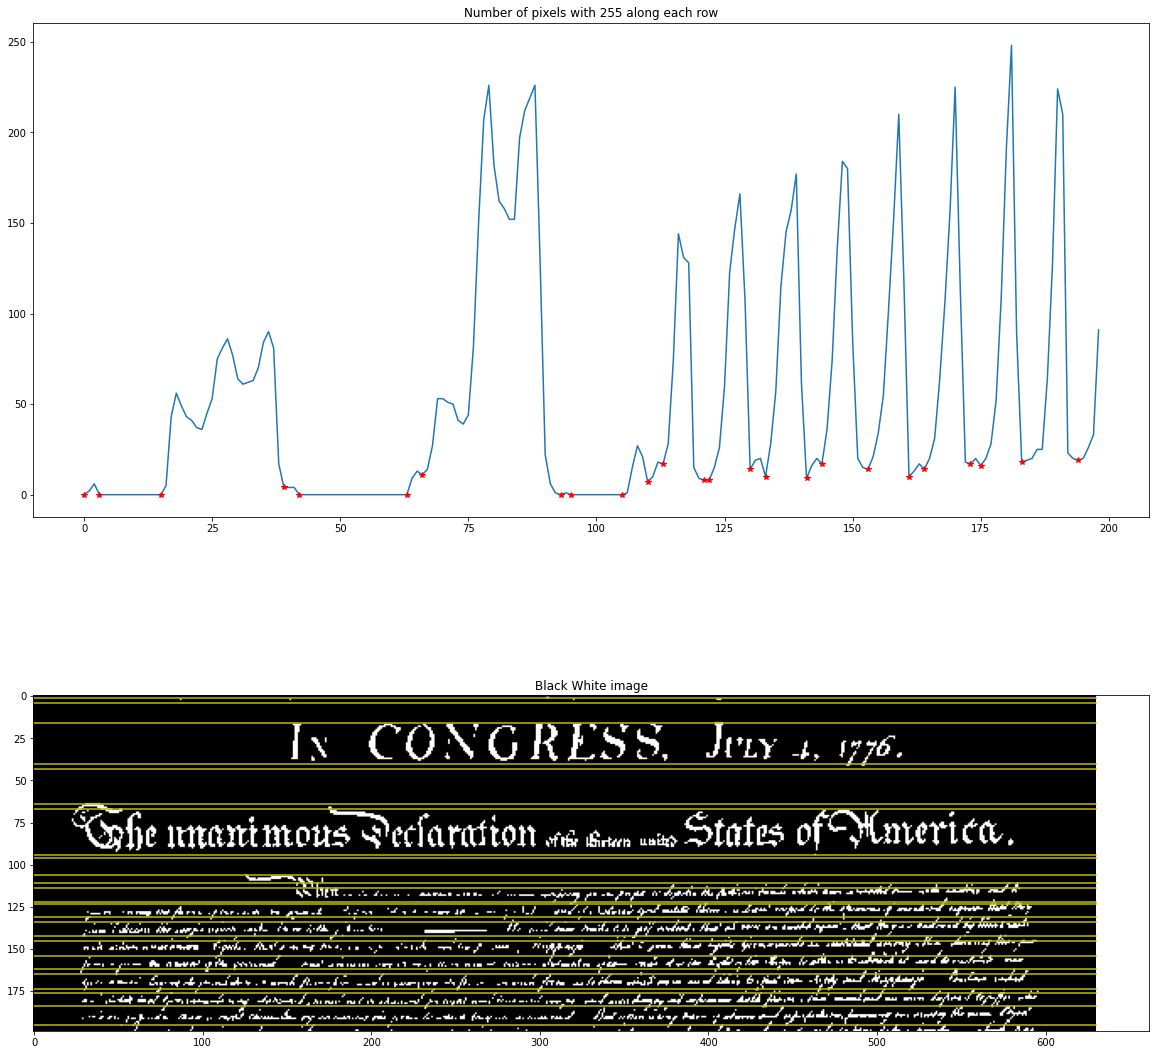

In [ ]:
fig, axs = plt.subplots(2, 1)
fig.set_size_inches (20, 20)

num_255_row = np.sum(bw_doi, axis=1)

axs[0].plot(num_255_row[1:200]);
axs[0].set_title('Number of pixels with 255 along each row');
axs[1].imshow(bw_doi[1:200,:], 'gray');
axs[1].set_title('Black White image');

minima_locations = np.zeros(num_255_row.shape)
for i in range(1, 200) :
    if (((num_255_row[i] <= num_255_row[i-1]) and (num_255_row[i] < num_255_row[i+1])) or
        ((num_255_row[i] < num_255_row[i-1]) and (num_255_row[i] <= num_255_row[i+1]))):
# You can experiment with adding various combinations of "="" in the conditions above and 
# observe their effect on the demarcation of the text lines 
# Notice how none of the combinations give us all the line demarcations properly
# How would you fix it? Hint: you will have to add another combination

        if (num_255_row[i] < 25) :
            axs[0].plot (i-1, num_255_row[i], 'r*')
    # Why are we using i-1 to mark the minima location rather than i in the plot? Ans: The plot starts at horizontal axis = 1 not 0.
            axs[1].plot(np.array([0, bw_doi.shape[1]]), np.array([i, i]), 'y')
            minima_locations[i] = 1



# Scanned document to text

* Text detection and recognition in scanned documents have lots of uses, e.g., digital library initiative. There is need to create searchable texts from scanned old books and manuscripts, most of which are now hidden from the current generation, who are reliant on just digitized information. 

* Some of the advanced camera-based document scanning apps on your phone allow you to create an editable text versions of the imaged pages. These apps are essentially performing text detection and recognition. 

* What you have seen is just the first step towards building a complete algorithm -- the line detection step. After detecting each line, we then break up each line into words using, again, the gap signatures. Once each word in the page is outlined, we send the sub-image to an Optical Character Recognition (OCR) algorithm to clasasify into a word-text representation.

* Here are examples of available software that you can play with

> > https://cloud.google.com/vision/docs/ocr

* In general, creating editable text from scanned **typed** or **printed** documents is more straightforward than turning scanned **handwritten** documents into text. Below is an example of a computer vision system that targets handwritten documents. 

> > https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.158.8315&rep=rep1&type=pdf